In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json
import io

## Median of Idle Latency 

In [2]:
df = pd.read_csv('data/Idle latency over the years - rtt-max.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')

# Convert time series with index Month
# df.index = df['dtime per 30 days']
# x_dates = df['dtime per 30 days']
# del df['dtime per 30 days']
df.head()

,dtime per 30 days,Idle Latency
0,2010-12-27,NaN
1,2011-01-26,39.425
2,2011-02-25,38.329
3,2011-03-27,37.763
4,2011-04-26,37.797


<Figure size 1200x300 with 0 Axes>

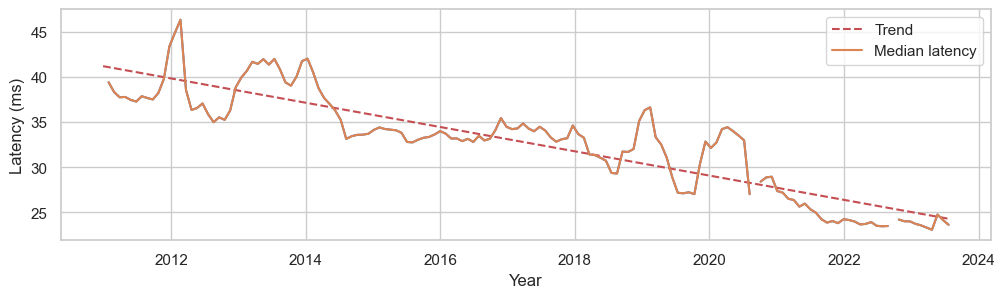

In [3]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

x_dates = df["dtime per 30 days"]
x_num = dates.date2num(x_dates)
y = df['Idle Latency']
idx = np.isfinite(y) & np.isfinite(x_num)

# Calculate fit line
trend = np.polyfit(x_num[idx], y[idx], 1)
fit = np.poly1d(trend)

# General plot again
plt.figure(figsize=(12,3))
plt.plot(x_dates, df['Idle Latency'])
plt.xlabel('Date')
plt.ylabel('Value')
#plt.figure(figsize=(12,3))

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
sns.set_theme(style="whitegrid")
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label="Trend")
plt.plot(x_dates, y, label="Median latency")
plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title('Median of Idle Latency (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')

# And show
plt.show()

## Median of Idle Latency by technology

In [4]:
df = pd.read_csv('data/Idle Latency over the years by technology - rtt-max.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Median Latency (ms)
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,40.324
2,Cable,2011-02-25,39.047
3,Cable,2011-03-27,38.450
4,Cable,2011-04-26,37.869


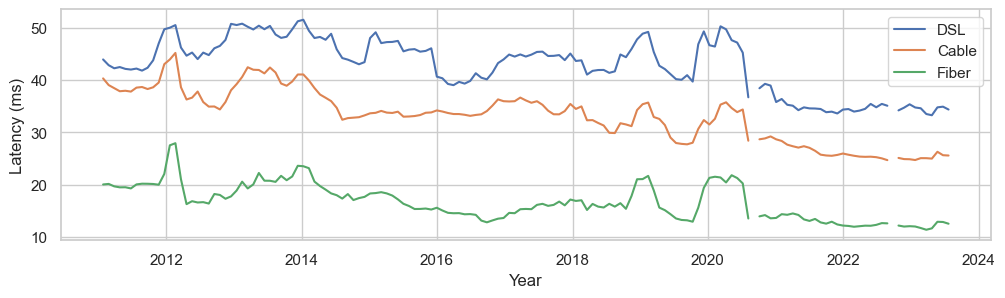

In [5]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()

In [6]:
def plot_median_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 2)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label="Trend")
    plt.plot(x_dates, y, label="Median latency")
    plt.ylabel('Latency (ms)')
    plt.xlabel('Year')
    plt.title(f"Median of Idle Latency Measurements Per Month (2011 - 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

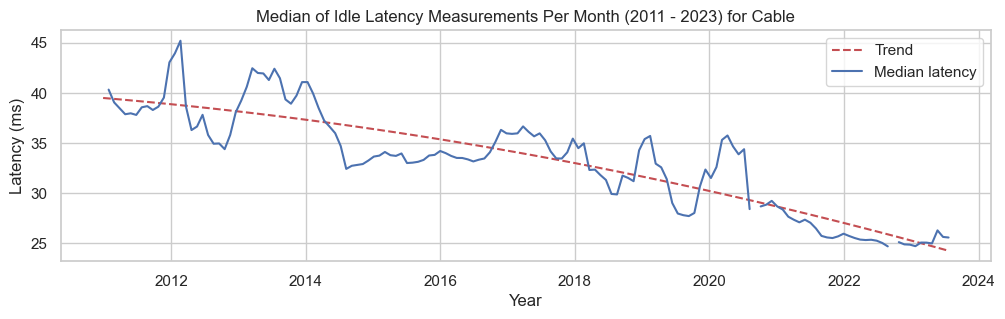

In [7]:
plot_median_by_tech("Cable")

### Fiber

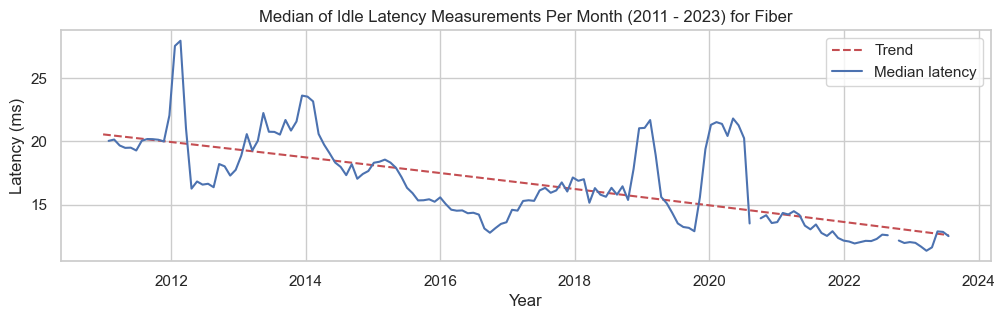

In [8]:
plot_median_by_tech("Fiber")

### DSL

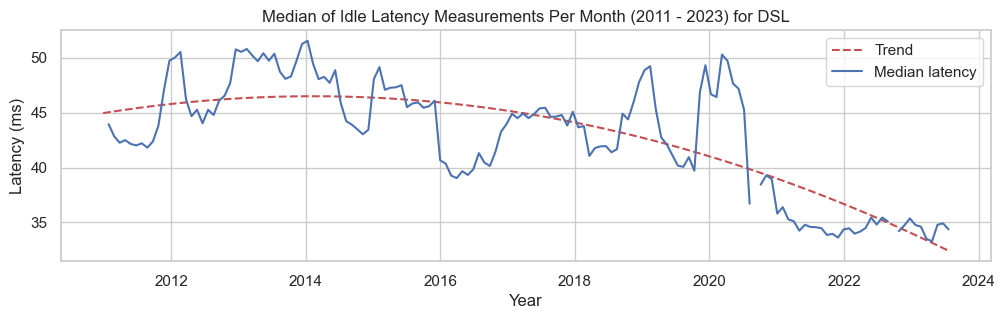

In [9]:
plot_median_by_tech("DSL")

## Percentage of data less than 100ms for Idle Latency

In [10]:
df = pd.read_csv('data/Percentage of data less than 100 ms - Idle latency.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df['Percentage'] = df['Percentage'].str.replace("%","").astype(float)
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Percentage
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,95.92
2,Cable,2011-02-25,96.69
3,Cable,2011-03-27,96.97
4,Cable,2011-04-26,97.54


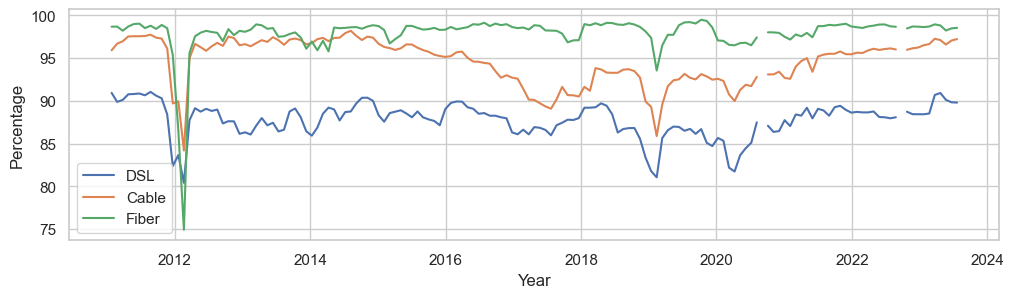

In [11]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Percentage']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Percentage')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()

## Moving averages for July 2023

In [12]:
avg_df = pd.read_csv('data/Moving_Average_average.csv')
pc_df = pd.read_csv('data/Moving_Average_95pc.csv')
# avg_df['dtime_local per 10 minutes'] = pd.to_datetime(avg_df['dtime_local per 10 minutes'], format='%H:%M', exact=True).dt.strftime('%H:%M')
# pc_df['dtime_local per 10 minutes'] = pd.to_datetime(pc_df['dtime_local per 10 minutes'], format='%H:%M', exact=True).dt.strftime('%H:%M')
avg_df['dtime_local per 10 minutes'] = pd.to_datetime(avg_df['dtime_local per 10 minutes'], unit='ms')
pc_df['dtime_local per 10 minutes'] = pd.to_datetime(pc_df['dtime_local per 10 minutes'], unit='ms')
# pc_df['95th percentile of rtt_max'] = pc_df['95th percentile of rtt_max'].str.replace(",","").astype(float)
# avg_df['Average of rtt_max'] = avg_df['Average of rtt_max'].str.replace(",","").astype(float)


# Convert time series with index Month
avg_df.index = avg_df['dtime_local per 10 minutes']
pc_df.index = pc_df['dtime_local per 10 minutes']
del avg_df['dtime_local per 10 minutes']
del pc_df['dtime_local per 10 minutes']
print(avg_df.head())
print(pc_df.head())

                            Average of rtt_max
dtime_local per 10 minutes                    
2023-07-03 00:00:00                        NaN
2023-07-03 00:10:00                  36.911665
2023-07-03 00:20:00                  35.765286
2023-07-03 00:30:00                  35.534863
2023-07-03 00:40:00                  34.826882
                            95th percentile of rtt_max
dtime_local per 10 minutes                            
2023-07-03 00:00:00                                NaN
2023-07-03 00:10:00                         109.487600
2023-07-03 00:20:00                          97.725325
2023-07-03 00:30:00                          99.749683
2023-07-03 00:40:00                          96.870287


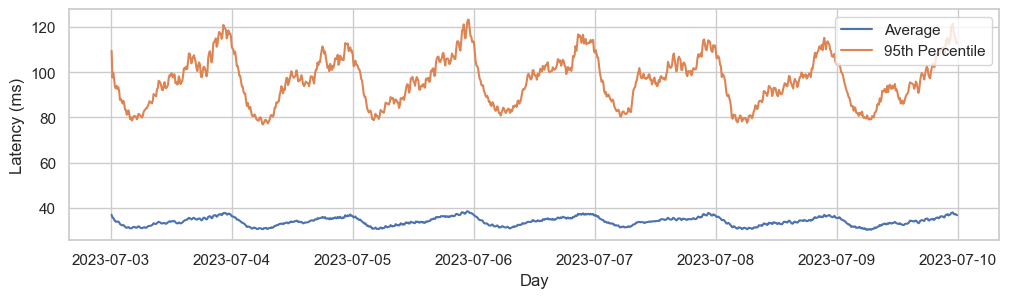

In [13]:
# Plot
sns.set_theme(style="whitegrid")
#sns.lineplot(df)
#plt.plot(df, color="blue", label="PC99")
plt.figure(figsize=(12,3))
plt.plot(avg_df, label="Average")
plt.plot(pc_df, label="95th Percentile")
plt.ylabel('Latency (ms)')
plt.xlabel('Day')
# plt.title('Median of Latency Under Load (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.show()